In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
%matplotlib inline

# Examining the data

In [2]:
df = pd.read_csv("bank.csv")

In [3]:
df.isna().sum()

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

In [4]:
df.education.value_counts()

secondary    995
tertiary     684
primary      217
Name: education, dtype: int64

In [5]:
df_original = df

We should check if the column with the most number of missing values have more than 25% of missing values. If yes, then we should drop it 

In [6]:
df_original.poutcome.isna().sum()/df.shape[0] *100

22.7

No. So we will leave it in the table

In [7]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


In [8]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no


In [9]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,1988.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.753018,1413.663500,13.851500,292.020500,1.909500,167.896000,2.561500
std,12.724358,3131.224213,9.712189,221.557295,1.378862,131.754126,3.400735
min,18.000000,-980.000000,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,32.000000,201.500000,5.000000,146.000000,1.000000,75.750000,1.000000
50%,38.000000,551.000000,12.000000,236.000000,1.000000,182.000000,2.000000
75%,50.000000,1644.500000,23.000000,379.000000,2.000000,251.000000,3.000000
max,93.000000,81204.000000,31.000000,1823.000000,11.000000,854.000000,55.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1988 non-null   float64
 1   job         1990 non-null   object 
 2   marital     2000 non-null   object 
 3   education   1896 non-null   object 
 4   default     2000 non-null   object 
 5   balance     2000 non-null   int64  
 6   housing     2000 non-null   object 
 7   loan        2000 non-null   object 
 8   contact     1809 non-null   object 
 9   day         2000 non-null   int64  
 10  month       2000 non-null   object 
 11  duration    2000 non-null   int64  
 12  campaign    2000 non-null   int64  
 13  pdays       2000 non-null   int64  
 14  previous    2000 non-null   int64  
 15  poutcome    1546 non-null   object 
 16  subscribed  2000 non-null   object 
dtypes: float64(1), int64(6), object(10)
memory usage: 265.8+ KB


<IPython.core.display.Javascript object>

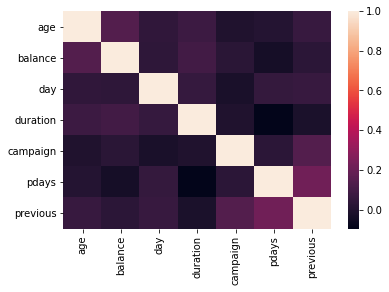

In [11]:
sns.heatmap(df.corr())

# Encode Cyclical Data

In [12]:
scale_mapper = {
    "jan": 1,
    "feb": 2,
    "mar": 3,
    "apr": 4,
    "may": 5,
    "jun": 6,
    "jul": 7,
    "aug": 8,
    "sep": 9,
    "oct": 10,
    "nov": 11,
    "dec": 12
}

df['month'] = df['month'].replace(scale_mapper)

df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,9,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,9,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,9,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,9,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,9,208,2,-1,0,NaN,yes


In [13]:
df['sin_month'] = np.sin(2*np.pi*df['month']/max(df['month']))
df['cos_month'] = np.cos(2*np.pi*df['month']/max(df['month']))

In [14]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed,sin_month,cos_month
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,4,957,2,131,2,failure,no,0.866025,-0.5
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,4,233,2,133,1,failure,no,0.866025,-0.5
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,4,126,2,239,1,failure,no,0.866025,-0.5
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,4,274,1,238,2,failure,no,0.866025,-0.5
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,4,479,1,307,1,failure,no,0.866025,-0.5


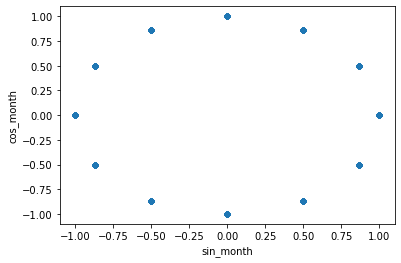

In [15]:
df.plot.scatter(x='sin_month',y='cos_month')

In [16]:
df = df.drop('month',axis=1)

# Encode Ordinal Categorical Attributes

As we have 2 ordinal categorical columns which are 'month' and 'education' we have to scale them to the numerical values.

In [17]:
scale_mapper1 = {
    "primary": 0,
    "secondary": 1,
    "tertiary": 2
}

df['education'] = df['education'].replace(scale_mapper1)

df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,subscribed,sin_month,cos_month
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,327,2,-1,0,NaN,yes,-1.0,-1.836970e-16
1996,28.0,admin.,single,1.0,no,127,no,no,cellular,16,1334,2,-1,0,NaN,yes,-1.0,-1.836970e-16
1997,81.0,retired,married,0.0,no,1154,no,no,telephone,17,231,1,-1,0,NaN,yes,-1.0,-1.836970e-16
1998,46.0,services,married,0.0,no,4343,yes,no,NaN,20,185,1,-1,0,NaN,yes,-1.0,-1.836970e-16
1999,40.0,entrepreneur,married,1.0,no,6403,no,no,cellular,22,208,2,-1,0,NaN,yes,-1.0,-1.836970e-16


# One-Hot Encode All Other Categorical Attributes

First, we need to encode attributes that have missing values on them. 

In [18]:
df = pd.get_dummies(df, columns=['job', 'contact', 'poutcome'], 
                        dummy_na=True, 
                        drop_first=True)
df.tail()

,age,marital,education,default,balance,housing,loan,day,duration,campaign,...,job_services,job_student,job_technician,job_unemployed,job_nan,contact_telephone,contact_nan,poutcome_other,poutcome_success,poutcome_nan
1995,20.0,single,NaN,no,2785,no,no,16,327,2,...,0,1,0,0,0,0,0,0,0,1
1996,28.0,single,1.0,no,127,no,no,16,1334,2,...,0,0,0,0,0,0,0,0,0,1
1997,81.0,married,0.0,no,1154,no,no,17,231,1,...,0,0,0,0,0,1,0,0,0,1
1998,46.0,married,0.0,no,4343,yes,no,20,185,1,...,1,0,0,0,0,0,1,0,0,1
1999,40.0,married,1.0,no,6403,no,no,22,208,2,...,0,0,0,0,0,0,0,0,0,1


Now, we should encode other attributes.

In [19]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,age,education,balance,day,duration,campaign,pdays,previous,sin_month,cos_month,...,contact_nan,poutcome_other,poutcome_success,poutcome_nan,marital_married,marital_single,default_yes,housing_yes,loan_yes,subscribed_yes
0,32.0,2.0,392,1,957,2,131,2,0.866025,-0.5,...,0,0,0,0,0,1,0,1,0,0
1,39.0,1.0,688,1,233,2,133,1,0.866025,-0.5,...,0,0,0,0,0,0,0,1,1,0
2,59.0,1.0,1035,1,126,2,239,1,0.866025,-0.5,...,0,0,0,0,1,0,0,1,1,0
3,47.0,1.0,398,1,274,1,238,2,0.866025,-0.5,...,0,0,0,0,1,0,0,1,1,0
4,54.0,1.0,1004,1,479,1,307,1,0.866025,-0.5,...,0,0,0,0,1,0,0,1,0,0


In [20]:
df_dummied = df

# Treatment of Missing Values in Numerical Columns

In [21]:
df.isna().sum()

age                   12
education            104
balance                0
day                    0
duration               0
campaign               0
pdays                  0
previous               0
sin_month              0
cos_month              0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_nan                0
contact_telephone      0
contact_nan            0
poutcome_other         0
poutcome_success       0
poutcome_nan           0
marital_married        0
marital_single         0
default_yes            0
housing_yes            0
loan_yes               0
subscribed_yes         0
dtype: int64

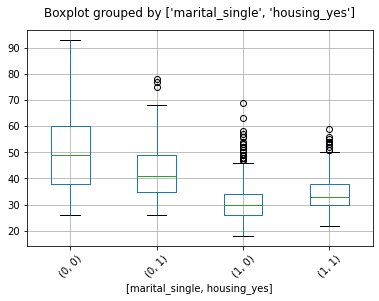

In [22]:
df.boxplot(column='age', by=['marital_single','housing_yes'], rot=45)
plt.title("")
plt.show()

In [23]:
ptable = df.pivot_table(values='age', 
                        index='marital_single',
                        columns='housing_yes',  
                        aggfunc=np.median)
ptable

housing_yes,0,1
marital_single,,
0,49.0,41.0
1,30.0,33.0


We can compare if the mean and median values are similar to the values shown above.

In [24]:
# Define function to return an element of the pivot table
def get_element(x):
    return ptable.loc[x['marital_single'], x['housing_yes']]

They are significantly different, but still we have only 12 missing values and if we would fill them according to 'housing' and 'marital' columns it may have no significant role as the 12 values are not a big deal.

In [25]:
print('Mean age: ',df.age.mean())
print('Median age: ',df.age.median())

Mean age:  41.753018108651915
Median age:  38.0


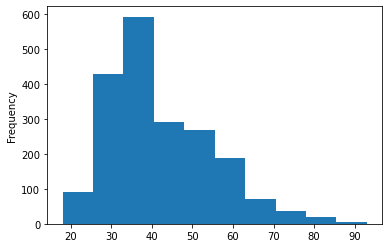

In [26]:
df.age.plot.hist()

Median looks like more accurate value to fill according to the histrogram.

In [27]:
# Replace missing values
#df['age'].fillna(df[df['age'].isnull()].apply(get_element, axis=1), inplace=True)
df['age'].fillna(df.age.median(), inplace=True)

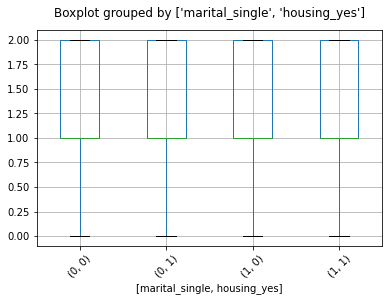

In [28]:
df.boxplot(column='education', by=['marital_single','housing_yes'], rot=45)
plt.title("")
plt.show()

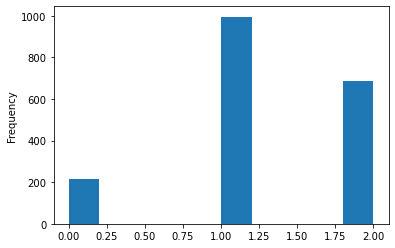

In [29]:
df.education.plot.hist()

In [30]:
print('Mean ed.level: ',df.education.mean())
print('Median ed.level: ',df.education.median())

Mean ed.level:  1.246308016877637
Median ed.level:  1.0


Median looks like more accurate value to fill according to the histrogram.

In [31]:
#no trend is seen in the chart so we can just use median to fill the missing values
df['education'].fillna(df['education'].median(), inplace=True)

# Rescaling Features

In [32]:
df

,age,education,balance,day,duration,campaign,pdays,previous,sin_month,cos_month,...,contact_nan,poutcome_other,poutcome_success,poutcome_nan,marital_married,marital_single,default_yes,housing_yes,loan_yes,subscribed_yes
0,32.0,2.0,392,1,957,2,131,2,0.866025,-5.000000e-01,...,0,0,0,0,0,1,0,1,0,0
1,39.0,1.0,688,1,233,2,133,1,0.866025,-5.000000e-01,...,0,0,0,0,0,0,0,1,1,0
2,59.0,1.0,1035,1,126,2,239,1,0.866025,-5.000000e-01,...,0,0,0,0,1,0,0,1,1,0
3,47.0,1.0,398,1,274,1,238,2,0.866025,-5.000000e-01,...,0,0,0,0,1,0,0,1,1,0
4,54.0,1.0,1004,1,479,1,307,1,0.866025,-5.000000e-01,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,20.0,1.0,2785,16,327,2,-1,0,-1.000000,-1.836970e-16,...,0,0,0,1,0,1,0,0,0,1
1996,28.0,1.0,127,16,1334,2,-1,0,-1.000000,-1.836970e-16,...,0,0,0,1,0,1,0,0,0,1
1997,81.0,0.0,1154,17,231,1,-1,0,-1.000000,-1.836970e-16,...,0,0,0,1,1,0,0,0,0,1
1998,46.0,0.0,4343,20,185,1,-1,0,-1.000000,-1.836970e-16,...,1,0,0,1,1,0,0,1,0,1


In [33]:
robust_scaler = RobustScaler()
df[['duration','balance','pdays']] = robust_scaler.fit_transform(df[['duration','balance','pdays']])

In [34]:
df['age'] = df['age']/max(df.age)

In [35]:
df['campaign'] = df['campaign']/max(df.campaign)

In [36]:
df['day'] = df['day']/max(df.day)

In [37]:
df['education'] = df['education']/max(df.education)

In [38]:
df_rescaled = df

In [39]:
df.head()

,age,education,balance,day,duration,campaign,pdays,previous,sin_month,cos_month,...,contact_nan,poutcome_other,poutcome_success,poutcome_nan,marital_married,marital_single,default_yes,housing_yes,loan_yes,subscribed_yes
0,0.344086,1.0,-0.110187,0.032258,3.094421,0.181818,-0.291013,2,0.866025,-0.5,...,0,0,0,0,0,1,0,1,0,0
1,0.419355,0.5,0.094941,0.032258,-0.012876,0.181818,-0.279601,1,0.866025,-0.5,...,0,0,0,0,0,0,0,1,1,0
2,0.634409,0.5,0.335412,0.032258,-0.472103,0.181818,0.325250,1,0.866025,-0.5,...,0,0,0,0,1,0,0,1,1,0
3,0.505376,0.5,-0.106029,0.032258,0.163090,0.090909,0.319544,2,0.866025,-0.5,...,0,0,0,0,1,0,0,1,1,0
4,0.580645,0.5,0.313929,0.032258,1.042918,0.090909,0.713267,1,0.866025,-0.5,...,0,0,0,0,1,0,0,1,0,0


# Treatment of Outliers

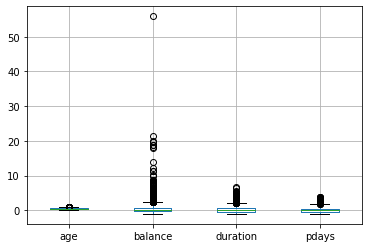

In [40]:
df.boxplot(column=['age','balance','duration','pdays'])
plt.show()

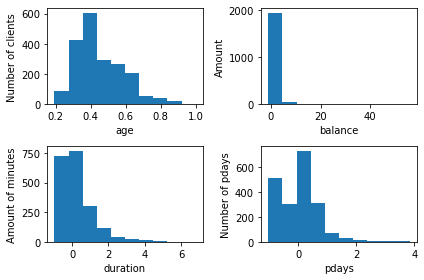

In [41]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
# Plot age
ax1.set_xlabel('age')
ax1.set_ylabel('Number of clients')
ax1.hist(df['age'], 10)

# Plot balance
ax2.set_xlabel('balance')
ax2.set_ylabel('Amount')
ax2.hist(df['balance'],10)

# Plot duration
ax3.set_xlabel('duration')
ax3.set_ylabel('Amount of minutes')
ax3.hist(df['duration'],10)

# Plot pdays
ax4.set_xlabel('pdays')
ax4.set_ylabel('Number of pdays')
ax4.hist(df['pdays'],10)

fig.tight_layout()
plt.show()

In [42]:
df[['duration','balance','pdays']].min()

duration   -0.982833
balance    -1.060984
pdays      -1.044223
dtype: float64

In [43]:
print(1-min(df.balance))
print(1-min(df.pdays))
print(1-min(df.duration))

2.060984060984061
2.044222539229672
1.9828326180257512


In [44]:
# Use a log transformation to decrease the impact of outliers
df['balance'] = np.log(df['balance']+(1.01-min(df.balance)))
df['pdays'] = np.log(df['pdays']+(1.01-min(df.pdays)))
df['duration'] = np.log(df['duration']+(1.01-min(df.duration)))

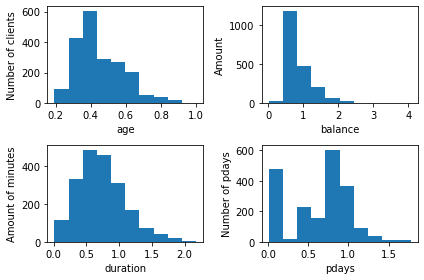

In [45]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
# Plot age
ax1.set_xlabel('age')
ax1.set_ylabel('Number of clients')
ax1.hist(df['age'], 10)

# Plot balance
ax2.set_xlabel('balance')
ax2.set_ylabel('Amount')
ax2.hist(df['balance'],10)

# Plot duration
ax3.set_xlabel('duration')
ax3.set_ylabel('Amount of minutes')
ax3.hist(df['duration'],10)

# Plot pdays
ax4.set_xlabel('pdays')
ax4.set_ylabel('Number of pdays')
ax4.hist(df['pdays'],10)

fig.tight_layout()
plt.show()

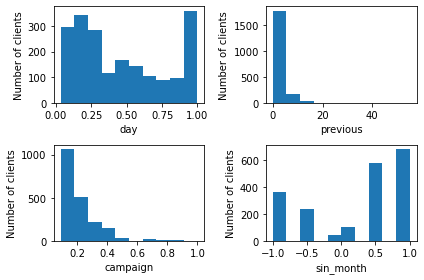

In [46]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
# Plot day
ax1.set_xlabel('day')
ax1.set_ylabel('Number of clients')
ax1.hist(df['day'], 10)

# Plot previous
ax2.set_xlabel('previous')
ax2.set_ylabel('Number of clients')
ax2.hist(df['previous'],10)

# Plot campaign
ax3.set_xlabel('campaign')
ax3.set_ylabel('Number of clients')
ax3.hist(df['campaign'],10)

# Plot month
ax4.set_xlabel('sin_month')
ax4.set_ylabel('Number of clients')
ax4.hist(df['sin_month'],10)

fig.tight_layout()
plt.show()

# Creation of Derived Features

In [47]:
df['TotalContacts'] = df_original['campaign'] + df['previous']
df[['TotalContacts']] = robust_scaler.fit_transform(df[['TotalContacts']])
df[['TotalContacts']].min()

TotalContacts   -0.666667
dtype: float64

In [48]:
df

,age,education,balance,day,duration,campaign,pdays,previous,sin_month,cos_month,...,poutcome_other,poutcome_success,poutcome_nan,marital_married,marital_single,default_yes,housing_yes,loan_yes,subscribed_yes,TotalContacts
0,0.344086,1.0,0.673351,0.032258,1.626738,0.181818,0.567136,2,0.866025,-5.000000e-01,...,0,0,0,0,1,0,1,0,0,0.333333
1,0.419355,0.5,0.772848,0.032258,0.683075,0.181818,0.573587,1,0.866025,-5.000000e-01,...,0,0,0,0,0,0,1,1,0,0.000000
2,0.634409,0.5,0.878130,0.032258,0.419190,0.181818,0.866879,1,0.866025,-5.000000e-01,...,0,0,0,1,0,0,1,1,0,0.000000
3,0.505376,0.5,0.675469,0.032258,0.768219,0.090909,0.864478,2,0.866025,-5.000000e-01,...,0,0,0,1,0,0,1,1,0,0.000000
4,0.580645,0.5,0.869163,0.032258,1.110459,0.090909,1.017941,1,0.866025,-5.000000e-01,...,0,0,0,1,0,0,1,0,0,-0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.215054,0.5,1.286239,0.516129,0.868524,0.181818,0.009950,0,-1.000000,-1.836970e-16,...,0,0,1,0,1,0,0,0,1,-0.333333
1996,0.301075,0.5,0.575012,0.516129,1.902895,0.181818,0.009950,0,-1.000000,-1.836970e-16,...,0,0,1,0,1,0,0,0,1,-0.333333
1997,0.870968,0.0,0.911826,0.548387,0.678730,0.090909,0.009950,0,-1.000000,-1.836970e-16,...,0,0,1,1,0,0,0,0,1,-0.666667
1998,0.494624,0.0,1.547316,0.645161,0.573208,0.090909,0.009950,0,-1.000000,-1.836970e-16,...,0,0,1,1,0,0,1,0,1,-0.666667


In [49]:
df['TotalContacts'] = np.log(df['TotalContacts']+(1.01-min(df.TotalContacts)))

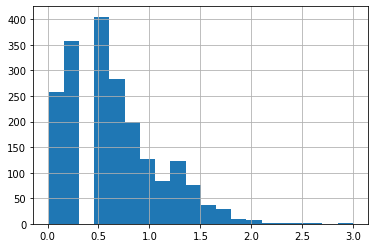

In [50]:
df['TotalContacts'].hist(bins=20)
plt.show()

In [51]:
df.drop('previous', axis=1, inplace=True)

In [52]:
pd.set_option('display.max_columns', 500)
df.head()

,age,education,balance,day,duration,campaign,pdays,sin_month,cos_month,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_nan,contact_telephone,contact_nan,poutcome_other,poutcome_success,poutcome_nan,marital_married,marital_single,default_yes,housing_yes,loan_yes,subscribed_yes,TotalContacts
0,0.344086,1.0,0.673351,0.032258,1.626738,0.181818,0.567136,0.866025,-0.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0.698135
1,0.419355,0.5,0.772848,0.032258,0.683075,0.181818,0.573587,0.866025,-0.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0.516808
2,0.634409,0.5,0.878130,0.032258,0.419190,0.181818,0.866879,0.866025,-0.5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0.516808
3,0.505376,0.5,0.675469,0.032258,0.768219,0.090909,0.864478,0.866025,-0.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0.516808
4,0.580645,0.5,0.869163,0.032258,1.110459,0.090909,1.017941,0.866025,-0.5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0.295154


# Save the Prepared Dataset

In [53]:
df.to_csv('bank_train_prepared.csv',index=False)